In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import operator
import matplotlib.pyplot as plt

In [26]:
def distance(item1, item2, cols):
    length = 0
    for i in range(cols):
        length += (item1[i] - item2[i]) ** 2
    return length

def get_neighbours(trainSet, element, k):
    distances = []
    for item in trainSet:
        distances.append((distance(element, item, 4), item))
    distances.sort(key=operator.itemgetter(0))
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i])
    return neighbours

In [40]:
def get_response(neighbours):
    classes = {}
    for item in neighbours:
        item = item[1]
        if classes.get(item[4], None) is None:
            classes[item[4]] = 1
        else:
            classes[item[4]] += 1
    biggest, cl = 0, ''
    for key in classes.keys():
        if classes[key] > biggest:
            biggest = classes[key]
            cl = key
    return cl

In [58]:
iris = pd.read_csv('datasets/iris.csv')
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

trainSet = np.concatenate([x_train, np.array([y_train]).T], axis=1)
testSet = np.concatenate([x_test,  np.array([y_test]).T], axis=1)

In [59]:
def visualize(x, y):
    plt.plot(x, y, c='g')
    plt.show()

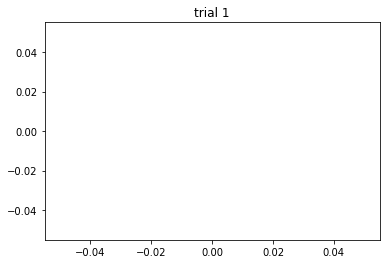

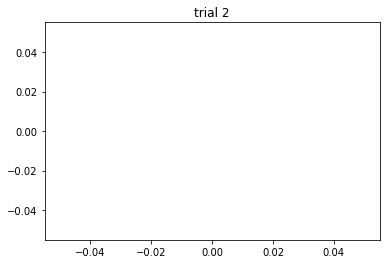

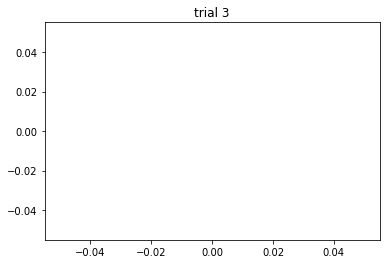

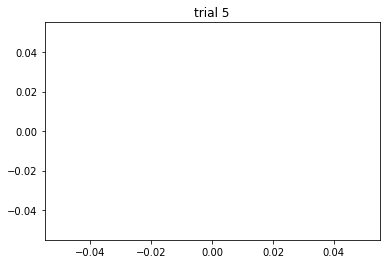

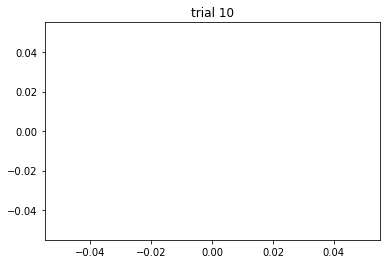

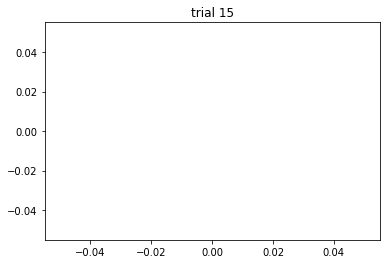

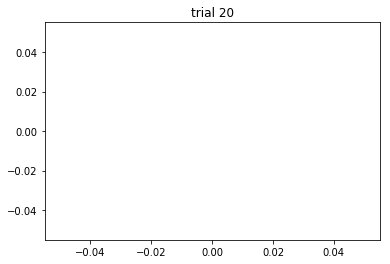

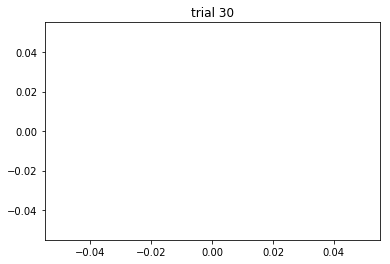

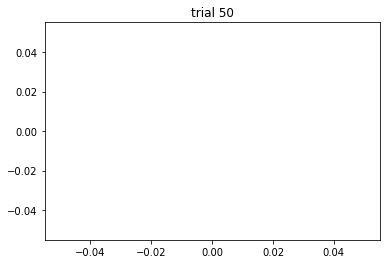

[1, 2, 3, 5, 10, 15, 20, 30, 50] [3, 3, 2, 2, 1, 2, 2, 4, 4]


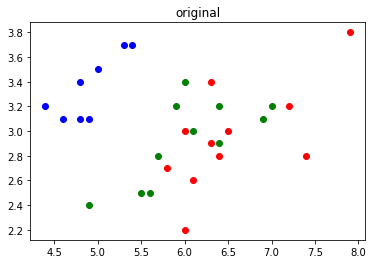

In [79]:
ks = [1, 2, 3, 5, 10, 15, 20, 30, 50]
errors = []
for k in ks:
    y_predicted = []
    for item in testSet:
        neigh = get_neighbours(trainSet, item, k)
        y_predicted.append(get_response(neigh))

    visualize_scatter(x_test[:, 0], y_predicted, title='trial {}'.format(k))
    error = 0
    for i in range(len(testSet)):
        error += y_predicted[i] != y_test[i]
    errors.append(error)

print(ks, errors)
#visualize(ks, errors)
visualize_scatter(x_test[:, [0, 1]], y_test, title='original')


In [78]:
def visualize_scatter(x, y, title):
    plt.plot(x[y=='setosa', 0], x[y=='setosa', 1], 'bo')
    plt.plot(x[y=='versicolor', 0], x[y=='versicolor', 1], 'go')
    plt.plot(x[y=='virginica', 0], x[y=='virginica', 1], 'ro')
    plt.title(title)
    plt.show()

In [77]:
print(x_test[:, 0])
print(y_predicted)

[6.  5.9 5.  5.3 6.4 6.  6.9 6.3 5.7 4.9 6.1 7.4 6.4 6.3 6.4 4.8 7.  4.8
 4.9 6.  6.5 6.1 5.4 7.9 4.4 5.6 4.6 5.5 5.8 7.2]
['versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica']
